### Get Started with DeGirum PySDK in Google Colab!
Welcome to the DeGirum PySDK Quickstart Colab! This notebook is designed to help you get started with PySDK right away, without the need to set up tools or dependencies on your local machine. While the Colab environment may not provide the full range of PySDK’s functionality, the included examples will give you a solid understanding of its capabilities. If you’d like to explore the complete features and unlock the full potential of PySDK, we encourage you to install it on your own machine. Let’s get started by installing the `degirum` and `degirum_tools` packages!

In [12]:
%pip install degirum
%pip install degirum_tools

### Setting the token
Since we’ll be using hardware hosted in the cloud by DeGirum, you’ll need to set a token to access these resources. This token serves as your secure key to connect to DeGirum’s cloud infrastructure and enables you to run the examples provided in this notebook seamlessly.

To guide you through the process of obtaining your token and adding it as a new secret in Google Colab, refer to the videos below:  

[![Generating a Token for the DeGirum AI Hub](https://img.youtube.com/vi/iyii0RzyFm8/0.jpg)](https://youtu.be/iyii0RzyFm8)
[![How to Add a New Secret in Google Colab](https://img.youtube.com/vi/GmevDVlT0OQ/0.jpg)](https://youtu.be/GmevDVlT0OQ)  

*Click on the thumbnail to watch the tutorial video.*  



You may verify your token with this code:

In [13]:
# Attempt to install GStreamer and its Python bindings if not already installed.
# This is often needed in environments like Colab for video-related functionalities.
import sys
!apt-get update -qq > /dev/null
!apt-get install -y python3-gi gir1.2-gst-plugins-base-1.0 > /dev/null

import degirum_tools

# print cloud token
degirum_tools.get_token()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


'dg_8kzq981aVLnuD2i4Gh3CTBJxjGFzM9d28qPoH'

### Running Your First Inference

In this section, we’ll demonstrate how to use PySDK to perform object detection on an example image using a cloud-hosted AI model. Here’s what the code does:

1. **Import Required Libraries**: The `degirum` package is used for loading and using AI models, and `degirum_tools` provides utility functions such as obtaining a token and displaying results.

2. **Load the Object Detection Model**: The `degirum.load_model()` method loads a pre-trained YOLOv8 object detection model hosted in the DeGirum cloud. The key parameters here are:
   - `model_name`: Specifies the AI model to use.
   - `inference_host_address`: Indicates where inference will be performed. Setting it to `"@cloud"` connects the request to DeGirum’s cloud-hosted hardware, leveraging powerful compute resources without requiring local setup. For on-premise or local deployments, this value can be replaced with the IP address or hostname of the target device.
   - `zoo_url`: Defines the location of the model zoo, a repository of pre-trained AI models. In this example, it is set to `'degirum/models_hailort'`, specifying a cloud-hosted model zoo managed by DeGirum. The `zoo_url` format typically follows `<organization>/<model_zoo_name>` and can be customized for private repositories.
   - `token`: Authenticates your access to the cloud-hosted resources, retrieved here using `degirum_tools.get_token()`.

3. **Run Inference on an Image**: The model processes an example image (a URL pointing to an example image) and generates detection results.

4. **Display the Results**: The numeric results of the inference, including detected bounding boxes and class IDs, are printed to the console. Additionally, using `degirum_tools.Display`, the inference results are visualized with object overlays on the input image.

When you run this code, you should see hardware hosted on the cloud run an object classification model, identify detected objects, and show bounding boxes for those detected objects with only a few lines of code.

- bbox: [210.8608856201172, 270.1265869140625, 331.5318603515625, 361.11517333984375]
  category_id: 1
  label: bicycle
  score: 0.7735219597816467
- bbox: [355.7708740234375, 260.1676940917969, 415.45794677734375, 364.5289001464844]
  category_id: 0
  label: person
  score: 0.7070766091346741
- bbox: [55.899330139160156, 275.9025573730469, 177.16143798828125, 363.0513000488281]
  category_id: 1
  label: bicycle
  score: 0.7006438970565796
- bbox: [354.98675537109375, 291.8433837890625, 523.98828125, 367.9512939453125]
  category_id: 13
  label: bench
  score: 0.7006438970565796
- bbox: [426.5059509277344, 258.5828857421875, 473.8647155761719, 357.20672607421875]
  category_id: 0
  label: person
  score: 0.5488012433052063



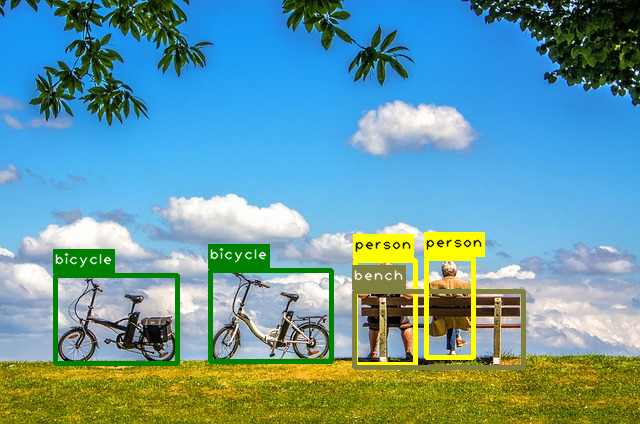

In [14]:
import degirum as dg, degirum_tools

# load object detection AI model
model = dg.load_model(
    model_name="yolov8n_relu6_coco--640x640_quant_hailort_hailo8l_1",
    inference_host_address="@cloud",
    zoo_url='degirum/models_hailort',
    token=degirum_tools.get_token(),
)

# perform AI model inference on given image source
inference_result = model("https://raw.githubusercontent.com/DeGirum/PySDKExamples/main/images/bikes.jpg")

# show results of inference
print(inference_result)  # numeric results
with degirum_tools.Display() as display:
    display.show_image(inference_result)

### Unified AI Inference with DeGirum PySDK
We will now highlight the core capabilities of PySDK, showcasing its flexibility and simplicity in deploying AI models across multiple hardware platforms. By specifying the appropriate model name and model zoo, you can seamlessly run different types of models, such as classification, detection, keypoint detection, or segmentation, using the same unified interface. The JSON configuration provided in the code below enables you to select the hardware you want to use for the AI task you want to perform. We assign a model zoo URL as well as the model names from the DeGirum AI Hub for each AI task. Our approach abstracts hardware-specific complexities, driving a consistent experience for diverse AI tasks.

In the code below, `degirum_tools.Display`, overlays an intuitive visualization of the model's inference results on the input image. This example underscores PySDK’s design philosophy: different models, same code, unified visualization.

In [15]:
import ipywidgets as widgets
from IPython.display import display
import degirum as dg, degirum_tools

# Define configurations
model_configurations = {
    "Hailo": {
        "zoo_url": "degirum/models_hailort",
        "model_names": {
            "classification": ["yolov8s_silu_imagenet--224x224_quant_hailort_hailo8l_1"],
            "detection": ["yolov8n_relu6_coco--640x640_quant_hailort_hailo8l_1"],
            "keypoint_detection": ["yolov8n_relu6_widerface_kpts--640x640_quant_hailort_hailo8l_1"],
            "segmentation": ["yolov8n_relu6_coco_seg--640x640_quant_hailort_hailo8l_1"],
        },
    },
}

source_images = {
    "classification": "https://raw.githubusercontent.com/DeGirum/PySDKExamples/main/images/Cat.jpg",
    "detection": "https://raw.githubusercontent.com/DeGirum/PySDKExamples/main/images/bikes.jpg",
    "keypoint_detection": "https://raw.githubusercontent.com/DeGirum/PySDKExamples/main/images/Mask1.jpg",
    "segmentation": "https://raw.githubusercontent.com/DeGirum/PySDKExamples/main/images/ThreePersons.jpg",
}

# Create widgets

model_type_dropdown = widgets.Dropdown(
    options=list(source_images.keys()),
    value="detection",
    description="Model Type:",
)

run_button = widgets.Button(
    description="Run Inference",
    button_style="success",  # Optional: 'success', 'info', 'warning', 'danger'
)

output = widgets.Output()

# Define the inference function
def run_inference(button_click):
    with output:
        output.clear_output()  # Clear previous output
        hardware_option = "Hailo"
        model_type = model_type_dropdown.value

        inference_host_address = "@cloud"
        zoo_url = model_configurations[hardware_option]["zoo_url"]
        model_name = model_configurations[hardware_option]["model_names"][model_type][0]
        source_image = source_images[model_type]

        print(f"Running inference on hardware: {hardware_option}")
        print(f"Model type: {model_type}")
        print(f"Model name: {model_name}")

        # Load and run inference
        model = dg.load_model(
            model_name=model_name,
            inference_host_address=inference_host_address,
            zoo_url=zoo_url,
            token=degirum_tools.get_token()
        )
        inference_result = model(source_image)

        print("Inference result:")
        print(inference_result)
        with degirum_tools.Display() as display:
            display.show_image(inference_result)

# Link the Run button to the inference function
run_button.on_click(run_inference)

# Display widgets and output
display(model_type_dropdown, run_button, output)


Dropdown(description='Model Type:', index=1, options=('classification', 'detection', 'keypoint_detection', 'se…

Button(button_style='success', description='Run Inference', style=ButtonStyle())

Output()

### Explore and Experiment with DeGirum PySDK

This example demonstrates how to perform AI inference using PySDK with a pre-trained model hosted in the cloud. We encourage you to experiment further by trying out different **model zoos**, **model names**, and **image sources**. For instance, you can explore various AI tasks such as object detection, classification, keypoint detection, or segmentation by selecting models from different model zoos (e.g., `models_hailort`, `models_tflite`, `models_openvino`, etc.) and providing images of your choice. This flexibility showcases PySDK's unified API, allowing you to customize and test AI inference across multiple hardware platforms and tasks effortlessly. Dive in and discover the possibilities!

[]



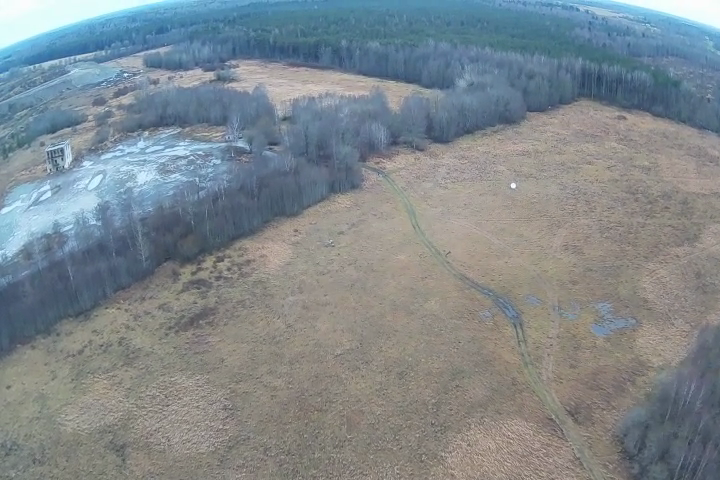

In [18]:
import degirum as dg, degirum_tools

hw_location = "@cloud" # "@cloud" for cloud inference, "@local" for local inference, or IP address for AI server inference
# model_zoo_url = "degirum/models_hailort"
# model_name = "yolov8n_relu6_coco--640x640_quant_hailort_hailo8l_1"
zoo_url="degirum/hailo"
model_name="yolov8n_relu6_car--640x640_quant_hailort_hailo8_1"
image_source = "images/frame-06224.png"

# load object detection AI model
model = dg.load_model(
    model_name=model_name,
    inference_host_address=hw_location,
    zoo_url=model_zoo_url,
    token=degirum_tools.get_token()
)

# perform AI model inference on given image source
inference_result = model(image_source)

# show results of inference
print(inference_result)  # numeric results
with degirum_tools.Display() as display:
    display.show_image(inference_result)